In [272]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn import tree
from sklearn.metrics import accuracy_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [273]:
df = pd.read_csv(
    'ceneval_mentor_v2.csv',
    encoding='utf-8',
    low_memory=False,
    index_col=0
)
#dc = pd.read_csv(
#    'cenevalPLTPROC.csv',
#    encoding='utf-8',
#    low_memory=False,
#    index_col=0
#)

df.head()

,TIPO_EXA,ANO_NAC,SEXO,LENG_MA,LENG_PA,PLT_PROC,RAZ_RAPT,RAZ_RACT,RAZ_OPT,RAZ_PCUM,...,SER_TVP,SER_TABL,CUARTOS,SER_PC,SER_TV,SER_AUTO,SER_BANO,VAC_RM,DICTAMEN,VECES_EXAM
0,0.0077,0.75,0,0.0,0.0,0.0355,0.0,1.0,1.0,0.0,...,1.0,1.0,0.22,1.0,1.0,1.0,1.0,0.0,0,0
1,0.0705,0.75,1,0.0,0.0,0.0900,1.0,0.0,0.0,0.0,...,0.0,0.0,0.22,1.0,1.0,1.0,1.0,1.0,0,0
2,0.0705,0.75,0,0.0,0.0,0.0900,1.0,1.0,1.0,0.0,...,0.0,0.0,0.41,0.0,1.0,0.0,1.0,0.0,1,0
3,0.0705,0.75,1,0.0,0.0,0.0900,1.0,1.0,1.0,1.0,...,1.0,1.0,0.41,1.0,1.0,0.0,1.0,1.0,1,0
4,0.0705,0.50,0,0.0,0.0,0.0900,1.0,1.0,1.0,0.0,...,0.0,0.0,0.22,1.0,1.0,0.0,1.0,0.0,1,0


In [274]:
#Features and rows
df.shape

(15613, 119)

In [275]:
# "DICTAMEN" measurement
df.groupby("DICTAMEN").size()

DICTAMEN
0    7466
1    8147
dtype: int64

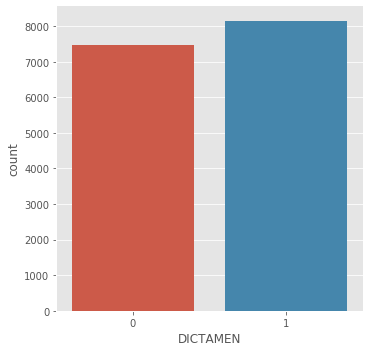

In [276]:
# "DICTAMEN" graph
sb.catplot("DICTAMEN", data=df, kind="count")

In [277]:
#sb.catplot("PLT_PROC", data = dc, kind="count", aspect = 15)

In [278]:
# Training arrays and features
y_train = df['DICTAMEN']
x_train = df.drop(['DICTAMEN'], axis=1).values 

In [279]:
# Decision tree
decision_tree = tree.DecisionTreeClassifier(criterion='entropy',
    min_samples_split=20,
    min_samples_leaf=5,
    max_depth = 7,
    class_weight="balanced")
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [280]:
# Image tree (dot)
with open(r"tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 4,
                              impurity = True,
                              feature_names = list(df.drop(['DICTAMEN'], axis=1)),
                              class_names = ['AUN NO SATISFACTORIO', 'SATISFACTORIO'],
                              rounded = True,
                              filled= True )

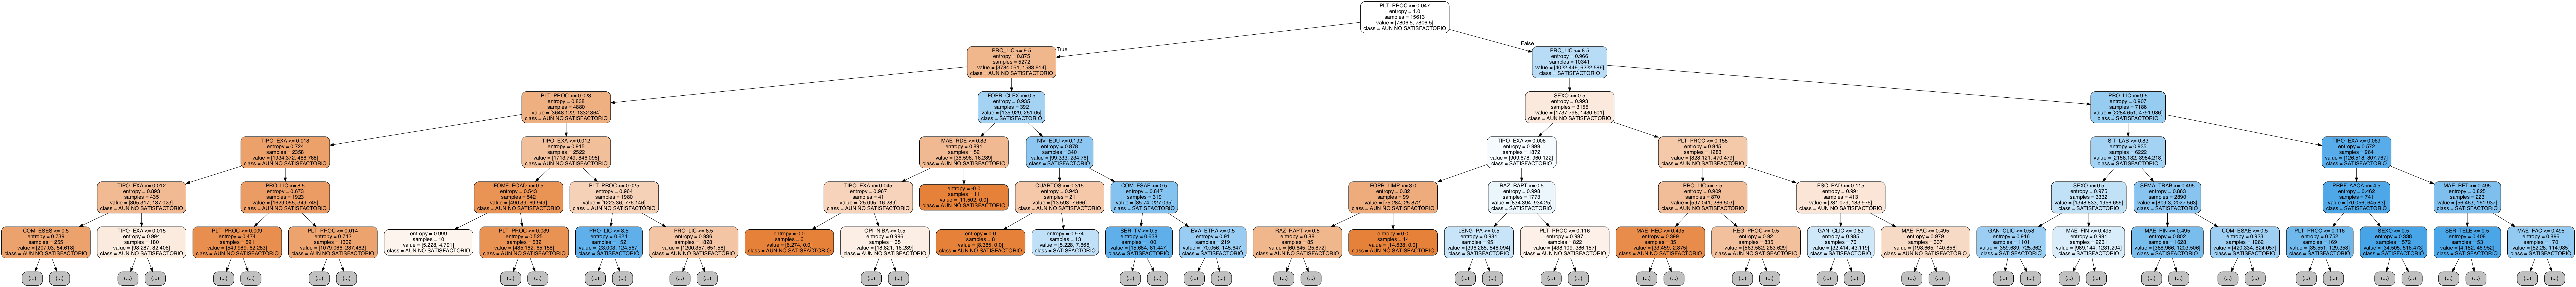

In [281]:
# Image tree (.png)
from PIL import Image
check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])
PImage("tree1.png")

In [282]:
# Desicion Tree Accuracy
accuracy = round(decision_tree.score(x_train, y_train) * 100, 2)
print(accuracy)

70.29
